In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt 
from sklearn import tree
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('DecisionTreeData.csv')
del dataset['Day']
dataset.head(14)

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
Outlook = {"Sunny": 0, "Overcast": 1, "Rain": 2}
Temp = {"Cool": 0, "Mild": 1, "Hot": 2}
Humidity = {"Normal": 0, "High": 1}
Wind = {"Weak": 0, "Strong": 1}
Decision = {"No": 0, "Yes": 1}
dataset['Outlook'] = dataset['Outlook'].map(Outlook)
dataset['Temp.'] = dataset['Temp.'].map(Temp)
dataset['Humidity'] = dataset['Humidity'].map(Humidity)
dataset['Wind'] = dataset['Wind'].map(Wind)
dataset['Decision'] = dataset['Decision'].map(Decision)

In [4]:
dataset.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,0,2,1,0,0
1,0,2,1,1,0
2,1,2,1,0,1
3,2,1,1,0,1
4,2,0,0,0,1


In [5]:
X = dataset[['Outlook','Temp.','Humidity','Wind']]
y = pd.Categorical(dataset['Decision'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [7]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

In [8]:
predictions

array([0, 0, 1, 1, 1])

In [9]:
y_test

[1, 1, 1, 0, 1]
Categories (2, int64): [0, 1]

In [10]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1
|--- feature_1 >  1.50
|   |--- class: 0



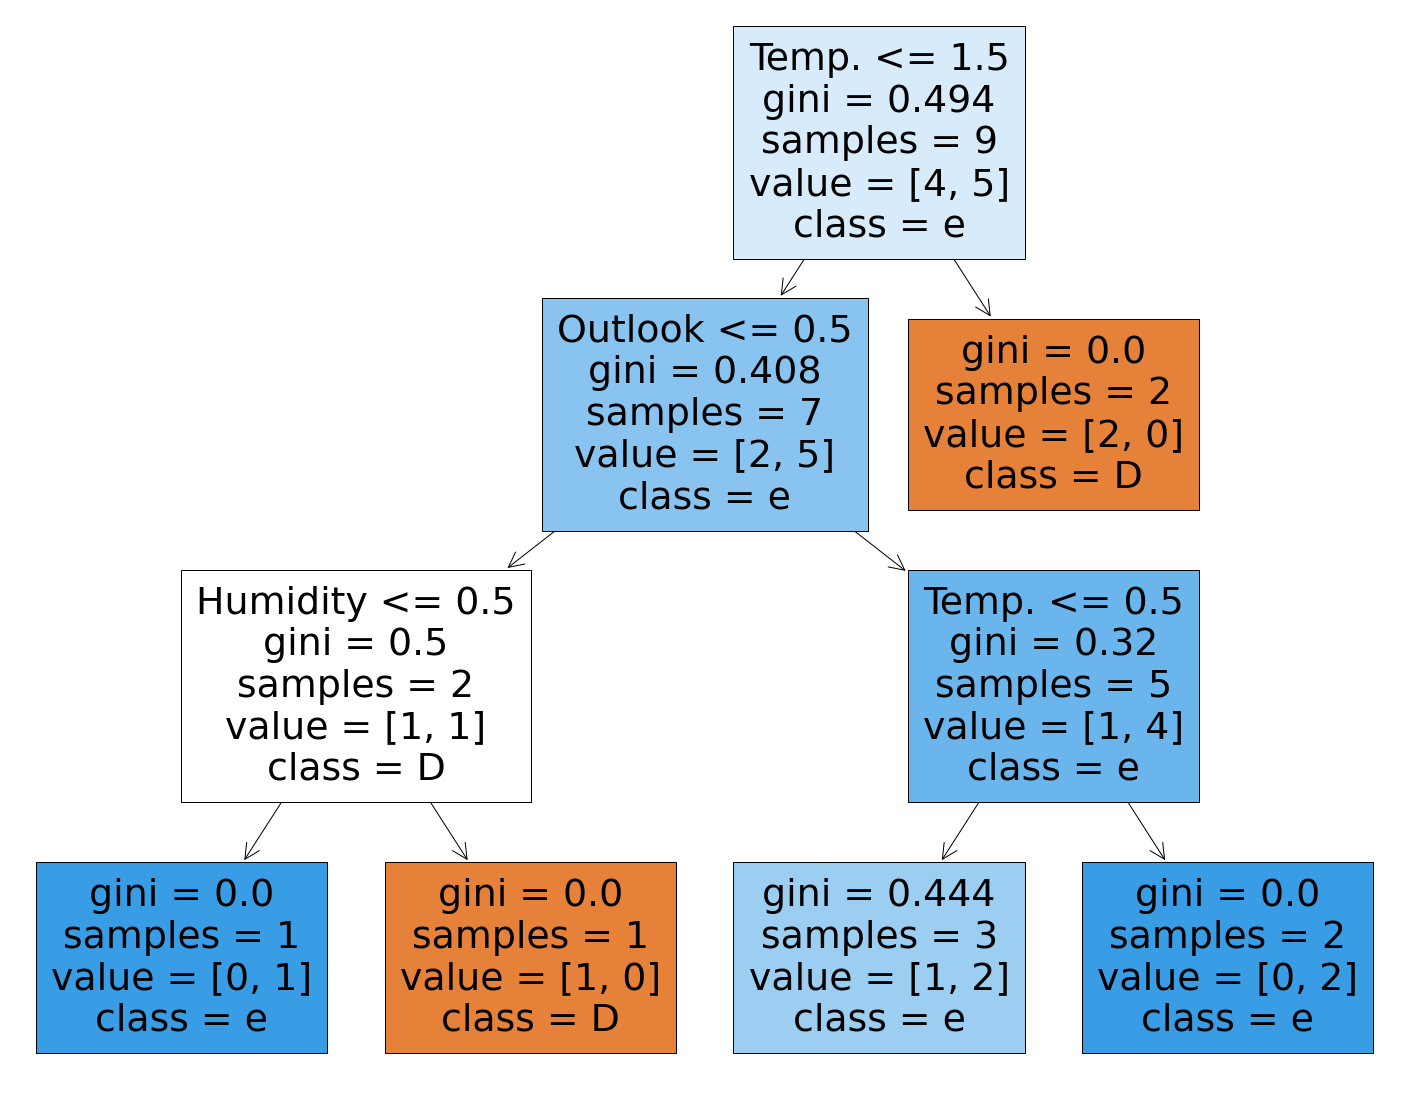

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=['Outlook','Temp.','Humidity','Wind'],  
                   class_names='Decision',
                   filled=True)

In [12]:
# Meassuring Accuracy
confusion_matrix(y_test, predictions)

array([[0, 1],
       [2, 2]])

#### Next Steps
- Refer the solved example here - https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial
- Solve the titanic problem using decision tree
